<a href="https://colab.research.google.com/github/Rishitha2805/Outbreak-Prediction-of-Covid-19-in-INDIA/blob/main/ML_Project_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
# Visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import datetime
import operator
from sklearn.model_selection import train_test_split
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error,mean_absolute_error
plt.style.use('fivethirtyeight')
%matplotlib inline
# Manipulating the default plot size
# plt.rcParams['figure.figsize'] = 10, 12
 
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
df = pd.read_csv('/content/Covid_Cases_dataset.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

# ***Confirmed***

In [ ]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
confirmed

,ds,y
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
174,2020-06-24,473105
175,2020-06-25,490401
176,2020-06-26,508953
177,2020-06-27,528859


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=20)
future.tail(20)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
179,2020-06-29
180,2020-06-30
181,2020-07-01
182,2020-07-02
183,2020-07-03
184,2020-07-04
185,2020-07-05
186,2020-07-06
187,2020-07-07
188,2020-07-08


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
194,2020-07-14,673223.524892,651013.128429,698287.625412
195,2020-07-15,684318.869456,659501.633848,711416.988570
196,2020-07-16,695486.153306,671709.052296,723621.419103
197,2020-07-17,706731.714619,681815.396652,733838.276869
198,2020-07-18,718240.401898,691991.489401,748376.761572


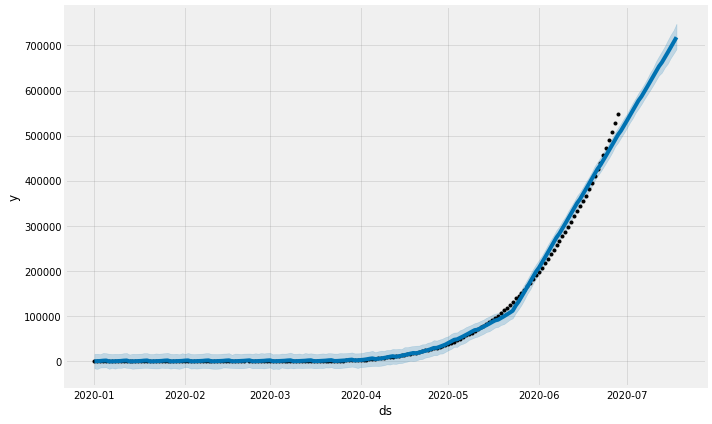

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

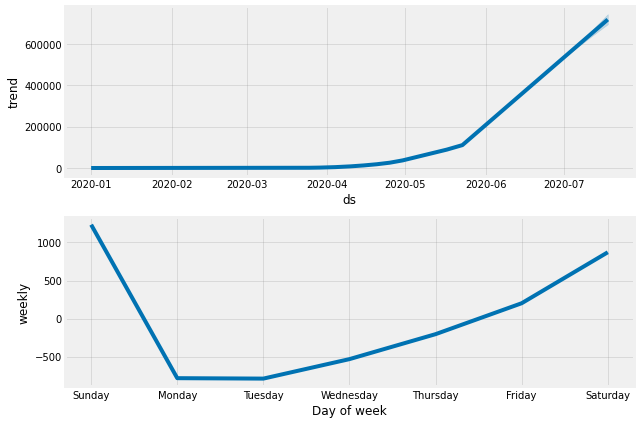

In [ ]:
confirmed_forecast_plot =m.plot_components(forecast)

# ***Deaths***

In [ ]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=20)
future.tail(20)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
179,2020-06-29
180,2020-06-30
181,2020-07-01
182,2020-07-02
183,2020-07-03
184,2020-07-04
185,2020-07-05
186,2020-07-06
187,2020-07-07
188,2020-07-08


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
194,2020-07-14,21111.727197,20159.940622,21933.042687
195,2020-07-15,21456.788714,20498.190946,22422.111219
196,2020-07-16,21804.209003,20735.658733,22751.502591
197,2020-07-17,22153.583084,21122.785373,23093.356611
198,2020-07-18,22499.937893,21433.236081,23536.435237


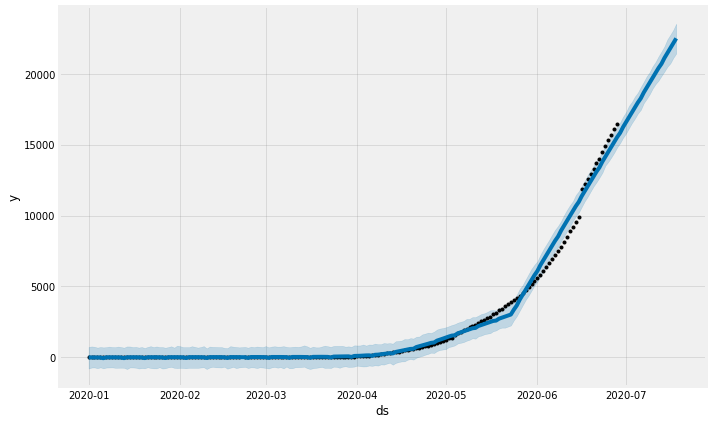

In [ ]:
deaths_forecast_plot = m.plot(forecast)

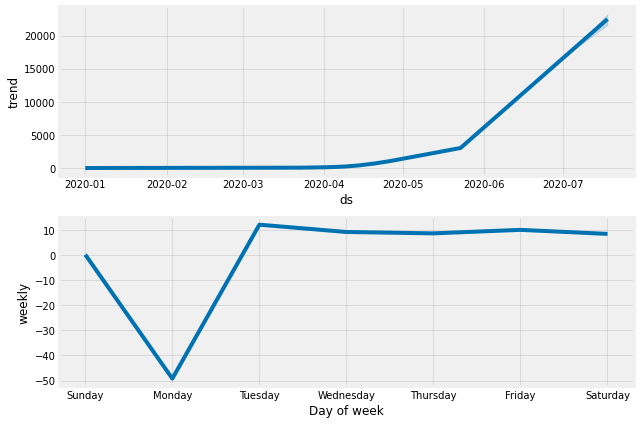

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

# ***Recovered***

In [ ]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=20)
future.tail(20)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
179,2020-06-29
180,2020-06-30
181,2020-07-01
182,2020-07-02
183,2020-07-03
184,2020-07-04
185,2020-07-05
186,2020-07-06
187,2020-07-07
188,2020-07-08


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
194,2020-07-14,385624.153159,365622.122308,404109.029216
195,2020-07-15,392145.629120,373049.970626,412684.684986
196,2020-07-16,399256.930125,379287.010576,419153.611650
197,2020-07-17,406357.190986,385564.585868,425548.474853
198,2020-07-18,413667.365693,392649.180129,434743.972361


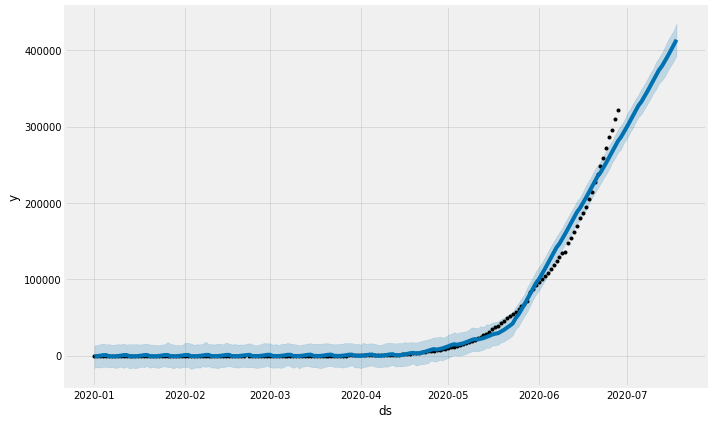

In [ ]:
recovered_forecast_plot = m.plot(forecast)

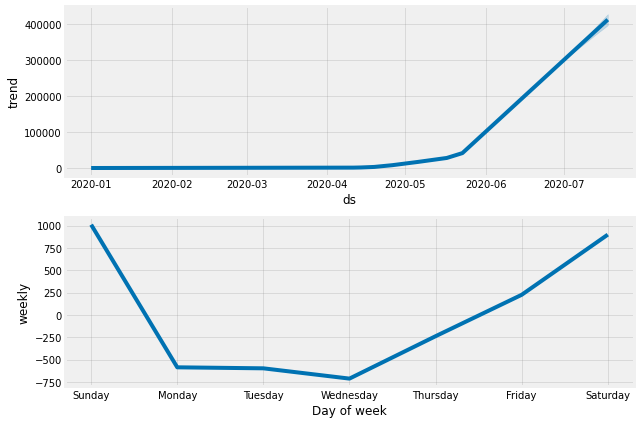

In [ ]:
recovered_forecast_plot = m.plot_components(forecast)